In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 12)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
China_df = country_df[country_df.Country == 'China'].set_index('Date')
world_without_China = pd.DataFrame({col:W[col] - China_df[col] for col in ['Confirmed', 'Recovered', 'Deaths']})
world_without_China['Country'] = ['World without China' for _ in range(len(world_without_China))]
world_without_China['Date'] = world_without_China.index
country_df = country_df.append(world_without_China)

In [7]:
country_df['Date'] = pd.to_datetime(country_df.Date)
country_df['Removed'] = country_df.Recovered + country_df.Deaths
country_df['Active'] = country_df.Confirmed - country_df.Removed
country_df['Mortality'] = country_df.Deaths/country_df.Removed
country_df['Part_Active'] = country_df.Active/country_df.Confirmed

In [8]:
last_day = dt.date.today() - dt.timedelta(days=1)
Last_day_df = country_df[country_df.Date == last_day].set_index('Country')
Last_day_df = Last_day_df[Last_day_df.Confirmed>5000]

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [9]:
C = ['Confirmed', 'Active', 'Removed', 'Recovered', 'Deaths', 'Mortality', 'Part_Active']

In [10]:
Last_day_df

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Australia,6108,2020-04-09,51,1472,1523,4585,0.033487,0.750655
Austria,13244,2020-04-09,295,5240,5535,7709,0.053297,0.582075
Belgium,24983,2020-04-09,2523,5164,7687,17296,0.328216,0.692311
Brazil,18092,2020-04-09,950,173,1123,16969,0.845948,0.937928
Canada,20654,2020-04-09,503,5162,5665,14989,0.088791,0.725719
Chile,5972,2020-04-09,57,1274,1331,4641,0.042825,0.777127
China,82883,2020-04-09,3339,77679,81018,1865,0.041213,0.022502
Czechia,5569,2020-04-09,112,301,413,5156,0.271186,0.925839
Denmark,5830,2020-04-09,237,1883,2120,3710,0.111792,0.636364


In [11]:
Important_countries = ['India', 'World', 'World without China',
                      'US', 'Italy', 'Spain', 'China',
                      'United Kingdom', 'Ireland', 'Norway',
                      'Korea, South', 'Iran'][::-1]
DF_Dict = {country: country_df[country_df.Country == country].set_index('Date').drop(columns = ['Country'])
                        for country in Last_day_df.index}

In [12]:
Removing_period = {}
for cun in DF_Dict:
    tr = int(Last_day_df[Last_day_df.index == cun].Removed)
    rp = len(DF_Dict[cun][DF_Dict[cun].Active >= tr])
    Removing_period[cun] = rp
Removing_period

{'Australia': 18,
 'Austria': 16,
 'Belgium': 13,
 'Brazil': 19,
 'Canada': 12,
 'Chile': 14,
 'China': 0,
 'Czechia': 23,
 'Denmark': 13,
 'France': 10,
 'Germany': 9,
 'India': 13,
 'Iran': 0,
 'Ireland': 22,
 'Israel': 17,
 'Italy': 18,
 'Korea, South': 7,
 'Netherlands': 21,
 'Norway': 34,
 'Peru': 2,
 'Poland': 20,
 'Portugal': 22,
 'Romania': 15,
 'Russia': 15,
 'Spain': 10,
 'Sweden': 26,
 'Switzerland': 13,
 'Turkey': 15,
 'US': 18,
 'United Kingdom': 16,
 'World': 13,
 'World without China': 15}

In [13]:
Daily_new =  ['Confirmed', 'Removed', 'Recovered', 'Deaths']
d = 7
for cun in Last_day_df.index:
    df = DF_Dict[cun]
    for col in Daily_new:
        L = list(df[col])
        K = L[:d] + [L[i+d] - L[i] for i in range(len(df) - d)]
        DF_Dict[cun]['Week_'+col] = K
    DF_Dict[cun]['Week_Mortality'] = DF_Dict[cun]['Week_Deaths']/DF_Dict[cun]['Week_Removed']

In [14]:
DC = DF_Dict['India'].columns
DF_Dict['India'].tail(10)

,Confirmed,Deaths,Recovered,Removed,Active,Mortality,Part_Active,Week_Confirmed,Week_Removed,Week_Recovered,Week_Deaths,Week_Mortality
Date,,,,,,,,,,,,
2020-03-31,1397,35,123,158,1239,0.221519,0.886901,861,108,83,25,0.231481
2020-04-01,1998,58,148,206,1792,0.281553,0.896897,1341,151,105,46,0.304636
2020-04-02,2543,72,191,263,2280,0.273764,0.896579,1816,198,146,52,0.262626
2020-04-03,2567,72,192,264,2303,0.272727,0.897156,1680,171,119,52,0.304094
2020-04-04,3082,86,229,315,2767,0.273016,0.897794,2095,207,145,62,0.299517
2020-04-05,3588,99,229,328,3260,0.301829,0.908584,2564,206,134,72,0.349515
2020-04-06,4778,136,375,511,4267,0.266145,0.893051,3527,377,273,104,0.275862
2020-04-07,5311,150,421,571,4740,0.262697,0.892487,3914,413,298,115,0.278450
2020-04-08,5916,178,506,684,5232,0.260234,0.884381,3918,478,358,120,0.251046


In [15]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
China,82883,2020-04-09,3339,77679,81018,1865,0.041213,0.022502
India,6725,2020-04-09,226,620,846,5879,0.267139,0.874201
Iran,66220,2020-04-09,4110,32309,36419,29801,0.112853,0.450030
Ireland,6574,2020-04-09,263,25,288,6286,0.913194,0.956191
Italy,143626,2020-04-09,18279,28470,46749,96877,0.391003,0.674509
"Korea, South",10423,2020-04-09,204,6973,7177,3246,0.028424,0.311427
Norway,6211,2020-04-09,108,32,140,6071,0.771429,0.977459
Spain,153222,2020-04-09,15447,52165,67612,85610,0.228465,0.558732
US,461437,2020-04-09,16478,25410,41888,419549,0.393382,0.909223


In [16]:
colors = {'India': 'Orange', 'World': 'Blue', 'World without China': 'Green', 'US': 'Black', 'China': 'red', 'Spain': 'yellow',
         'Italy': 'Green', 'Iran': 'red', 'Ireland': 'violet', 'United Kingdom': 'Purple', 'Korea, South': 'Black',
         'Norway': 'blue'}

def plotwithx(x, cols):
    for col in cols:
        if col!=x:
            plt.figure(figsize = (17, 7))
            plt.title(f'{col} with respect to {x}')
            plt.xlabel(x)
            plt.ylabel(col)
            if x in DC:
                plt.xscale('log')

            if col not in ['Mortality', 'Part_Active', 'Week_Mortality']:
                plt.yscale('log')
            for cun in Important_countries:
                df = DF_Dict[cun]
                if x == 'Date':
                    X = df.index
                else:
                    X = df[x]
                plt.plot(X, 
                         df[col],
                         label = cun,
                         linewidth = 3.5,
                         linestyle = '-.' if 'World' in cun else '-',
                         color = colors[cun], 
                         alpha = 0.6
                        )
            plt.legend(DF_Dict.keys())
            plt.plot()


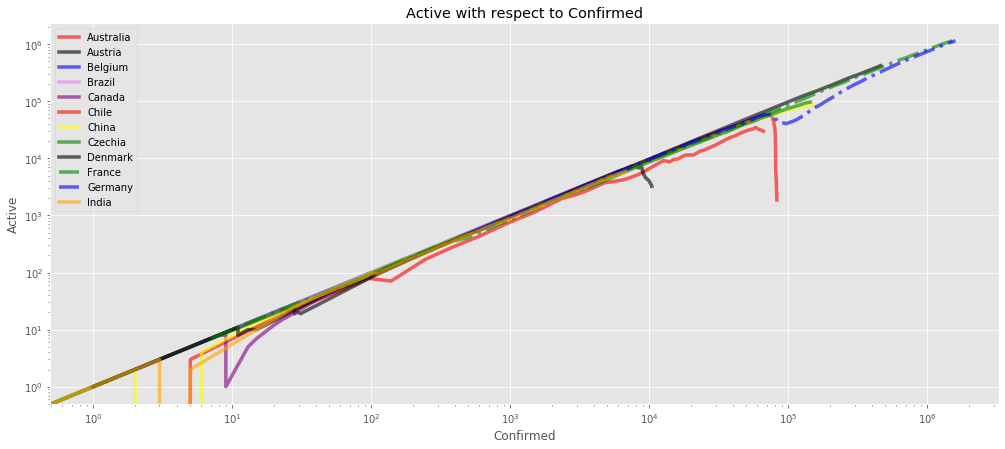

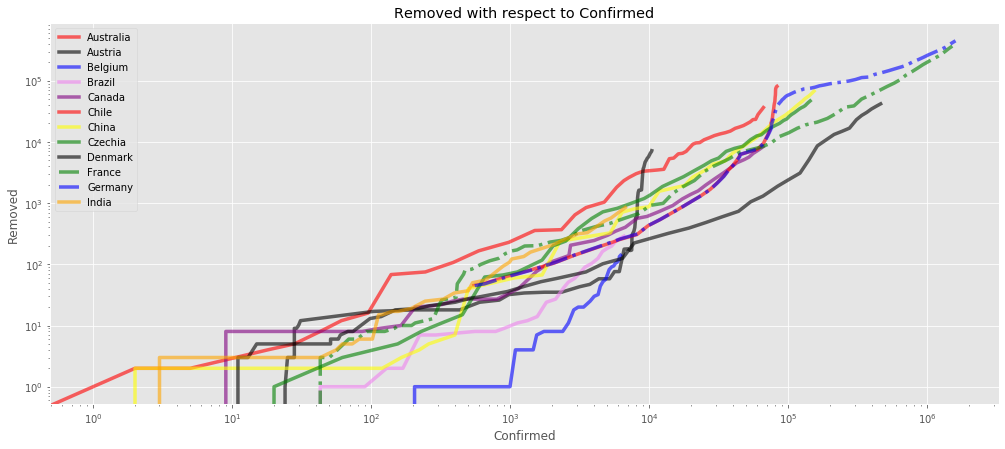

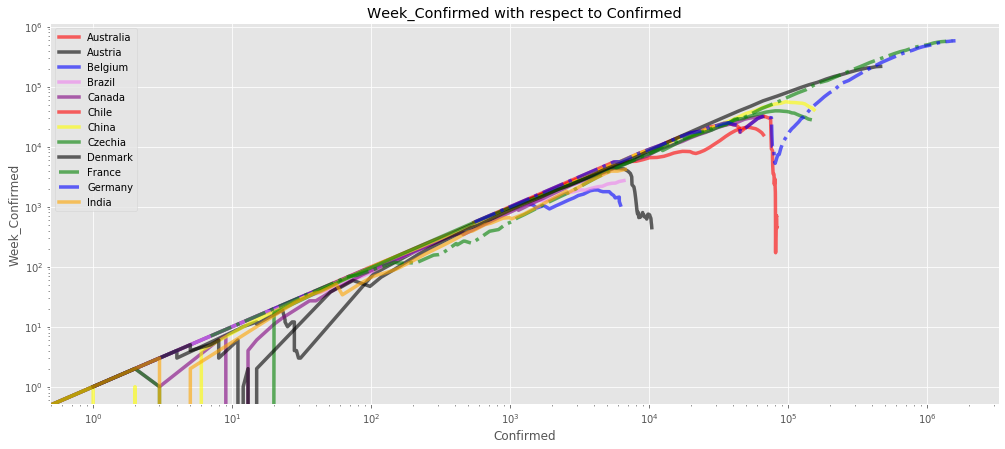

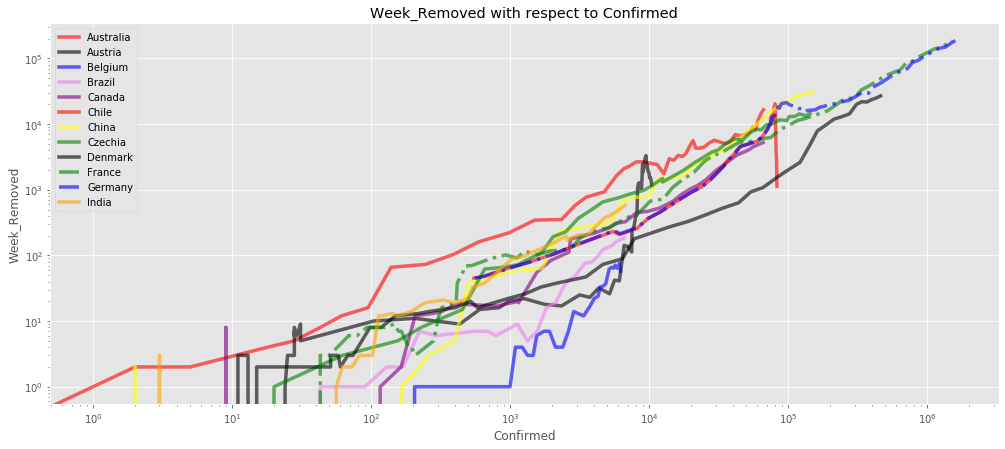

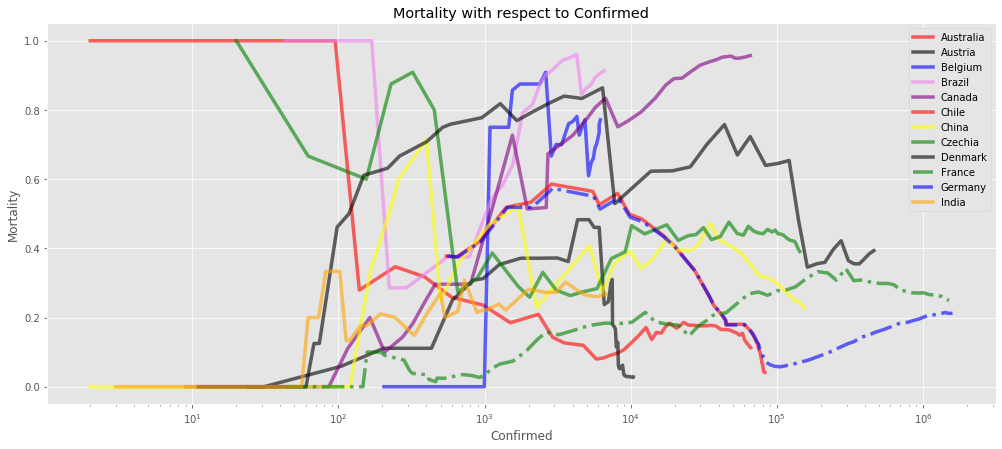

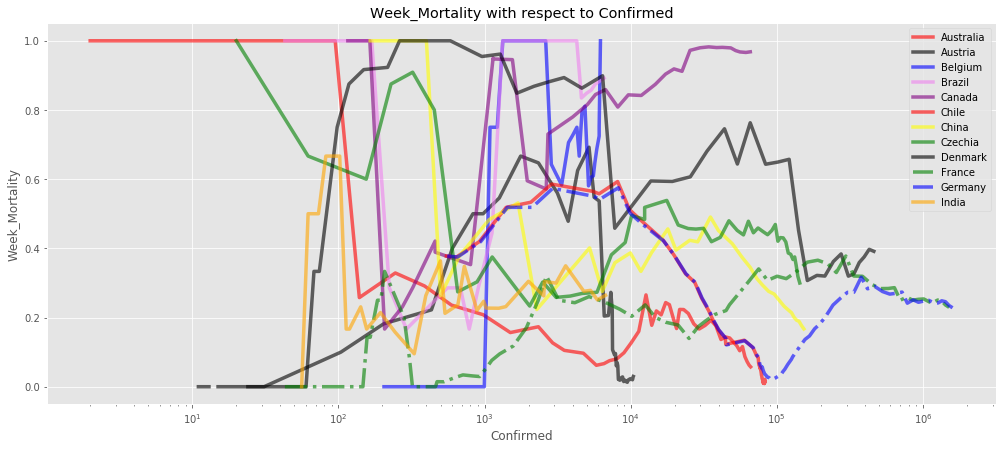

In [17]:
plotwithx('Confirmed', ['Active', 'Removed', 'Week_Confirmed', 'Week_Removed', 'Mortality', 'Week_Mortality'])

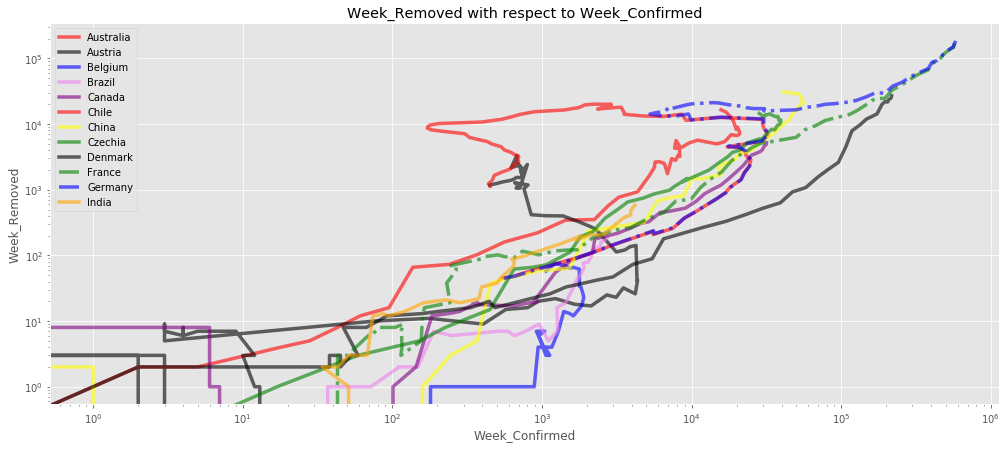

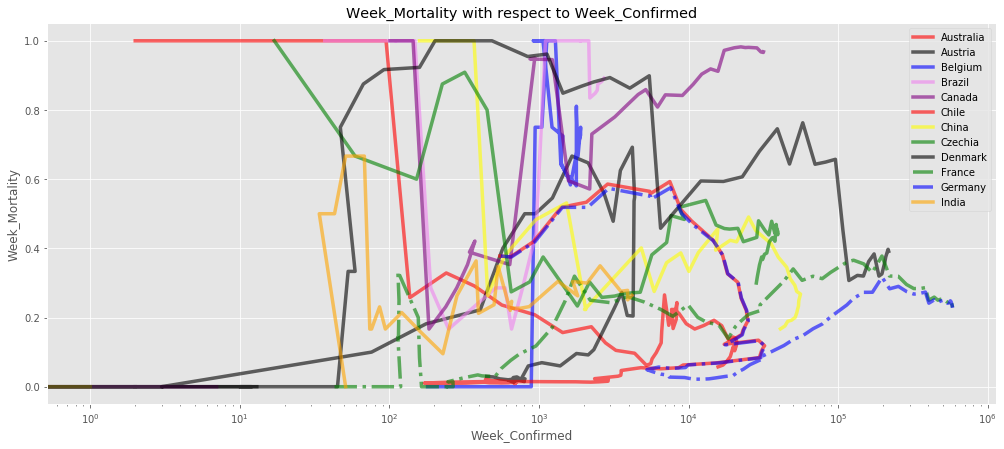

In [18]:
plotwithx('Week_Confirmed', ['Week_Removed', 'Week_Mortality'])

In [19]:
Last_day_df.sort_values('Part_Active', ascending = False)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Norway,6211,2020-04-09,108,32,140,6071,0.771429,0.977459
Ireland,6574,2020-04-09,263,25,288,6286,0.913194,0.956191
Portugal,13956,2020-04-09,409,205,614,13342,0.666124,0.956005
Brazil,18092,2020-04-09,950,173,1123,16969,0.845948,0.937928
Turkey,42282,2020-04-09,908,2142,3050,39232,0.297705,0.927865
Czechia,5569,2020-04-09,112,301,413,5156,0.271186,0.925839
Russia,10131,2020-04-09,76,698,774,9357,0.098191,0.923601
Poland,5575,2020-04-09,174,284,458,5117,0.379913,0.917848
US,461437,2020-04-09,16478,25410,41888,419549,0.393382,0.909223


In [20]:
Last_day_df.sort_values('Mortality', ascending = True)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
"Korea, South",10423,2020-04-09,204,6973,7177,3246,0.028424,0.311427
Australia,6108,2020-04-09,51,1472,1523,4585,0.033487,0.750655
China,82883,2020-04-09,3339,77679,81018,1865,0.041213,0.022502
Chile,5972,2020-04-09,57,1274,1331,4641,0.042825,0.777127
Germany,118181,2020-04-09,2607,52407,55014,63167,0.047388,0.534494
Austria,13244,2020-04-09,295,5240,5535,7709,0.053297,0.582075
Israel,9968,2020-04-09,86,1011,1097,8871,0.078396,0.889948
Switzerland,24051,2020-04-09,948,10600,11548,12503,0.082092,0.519854
Peru,5256,2020-04-09,138,1438,1576,3680,0.087563,0.700152


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


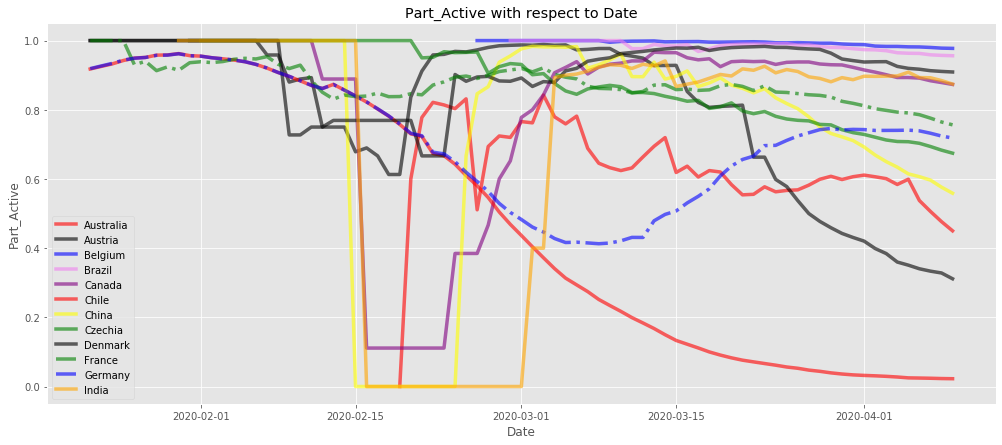

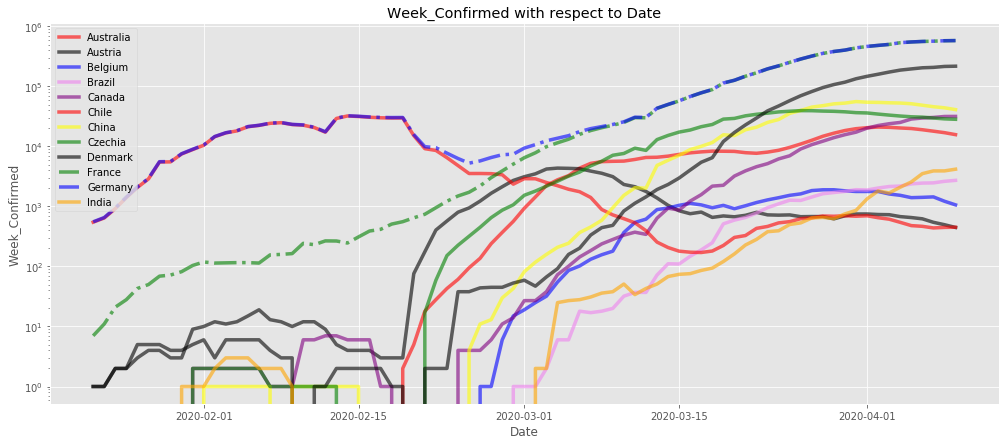

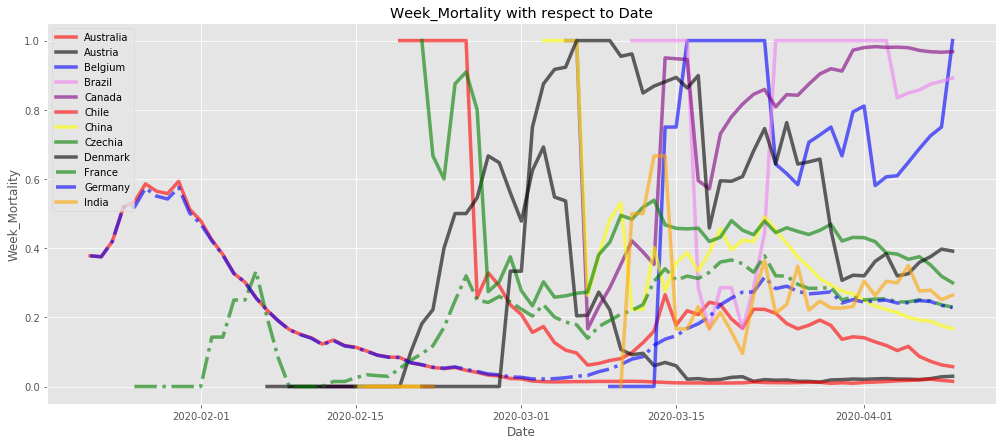

In [21]:
plotwithx('Date', ['Part_Active', 'Week_Confirmed', 'Week_Mortality'])

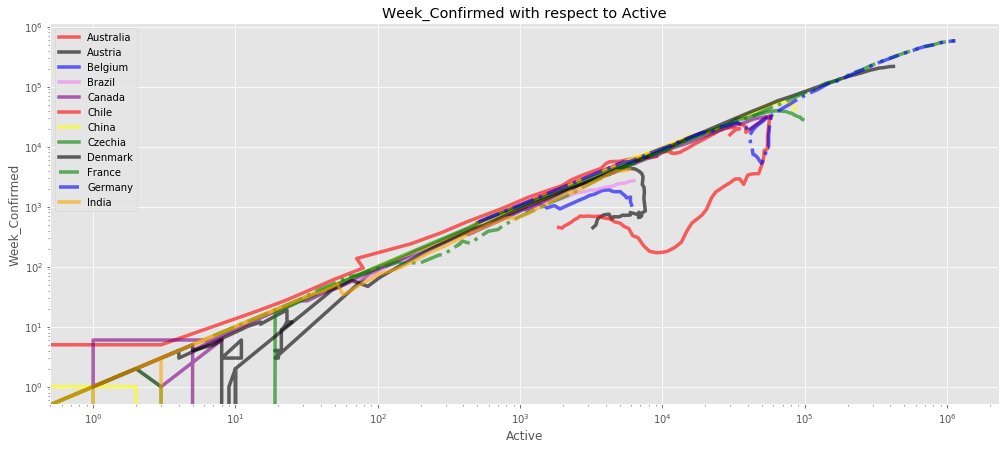

In [22]:
plotwithx('Active', ['Week_Confirmed'])